# Introduction of mglearn for unsupervised learning

## Installation

```bash
pip install mglearn
```

## Brief introduction

- mglearn 是在利用 python 进行机器学习相关分析的库
- 相比 sklearn ，mglearn 并不是十分常见，但却经常可以与 sklearn 同时使用
- mglearn 的相关介绍文档并不多，笔者认为 mglearn 主要的优势是其包含一些可用于机器学习的数据集以及其将机器学习的结果可视化展示
- 本文将以机器学习中 **非监督学习** 的例子来直观感受 mglearn 的操作，并借着对 mglearn 的使用，重温机器学习的内容

## Before we start

 ### Import module

- 需要先导入一些常用的模块并配置画图参数，没有安装的可以通过 pip 命令来安装

In [2]:
%matplotlib inline
from preamble import *
plt.rcParams['image.cmap'] = "gray"

- 忽略 Warnings

In [3]:
import warnings
warnings.filterwarnings("ignore", category=Warning)

### Types of unsupervised learning

无监督学习主要有两种类型: **数据集变换** 与 **聚类**

- **数据集变换** 数据集的无监督变换是 **创建数据新的表示** ，与数据原始表示相比，新的表示可能更容易被人或其他机器学习算法所理解
    - 利用无监督学习进行数据变换最常见的目的就是可视化、压缩数据，以及寻找信息量更大的数据表示以用于进一步的处理
    - 常见应用是 **降维（dimensionality reduction）**，它接受包含许多特征的数据的高维表示，并找到表示该数据的一种新方法，用较少的特征就可以概括其重要特性，降维的一个常见应用是为了可视化数据降为二维
    - 另一个应用是找到“构成”数据的各个组成部分，这方面的一个例子就是对文本文档集合进行主题提取，这里的任务是找到每个文档中讨论的未知主题，并学习每个文档中出现了哪些主题，这可以用于追踪社交媒体上的话题讨论，比如选举、枪支管制或流行歌手等话题
    - 相关的算法有: **主成分分析**、**非负矩阵分解（NMF）** 和 **流形学习**
- **聚类** 聚类算法将数据划分成不同的组，每组包含相似的物项。其目的是划分数据，使得一个簇内的数据点非常相似且不同簇内的数据点非常不同
    - 聚类算法为每个数据点分配（预测）一个数字，表示这个点属于哪个簇
    - 常用的聚类算法有: **k 均值聚类**、**凝聚聚类** 和 **DBSCAN**

### Challenges in unsupervised learning

- 无监督学习的一个主要挑战就是评估算法是否学到了有用的东西
- 无监督学习算法一般用于不包含任何标签值得数据，所以不知道正确的输出应该是什么，因此很难判断一个模型是否“表现良好”
    - 例如，假设聚类算法已经将所有的侧脸照片和所有的正面照片进行分组，这肯定是人脸照片集合的一种可能的划分方法，但并不是想要的那种方法
    - 没有办法“告诉”算法要的是什么，通常来说，评估无监督算法结果的一种方法就是 **人工检查**
    - 如果数据科学家想要更好地理解数据，那么无监督算法通常可以用于探索性的目的，而不是作为大型自动化系统的一部分

- 无监督算法的另一个常见应用是作为 **监督算法的预处理步骤**
    - 学习数据的一种新表示，有时可以提高监督算法的精度，或者 **减少内存占用** 和 **时间开销**

## Unsupervised learning example

### reprocessing and Scaling

一些算法（如神经网络和 SVM）对数据缩放非常敏感


因此，通常的做法是对特征进行调节，使数据表示更适合于这些算法，通常来说，这是对数据的一种简单的按特征的缩放和移动

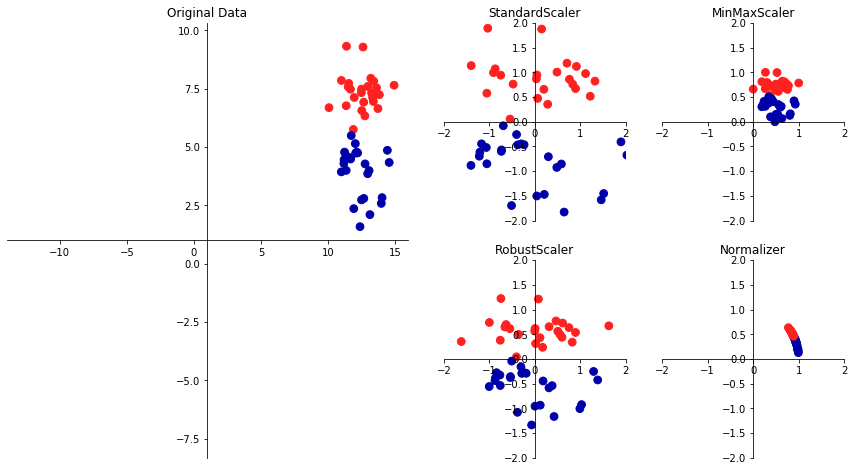

In [4]:
mglearn.plots.plot_scaling()

#### Different Kinds of Preprocessing

- **StandScaler** 
    - 确保每个特征的平均值为 0、方差为 1，使所有特征都位于同一量级
    - 但这种缩放不能保证特征任何特定的最大值和最小值

- **RubustScaler**
    - 工作原理与 StandScaler 类似，确保每个特征的统计属性都位于同一范围
    - 但 RobustScaler 使用的是中位数和四分位数，而不是平均值和方差，这样 RobustScaler 会忽略与其他点有很大不同的数据点（比如测量误差）
    - 这些与众不同的数据点也叫异常值（outlier），可能会给其他缩放方法造成麻烦

- **MinMaxScaler** 
    - 移动数据，使所有特征都刚好位于 0 到 1 之间
    - 对于二维数据集来说，所有数据都包含在 x 轴 0 到 1 与 y 轴 0 到 1 组成的矩形中

- **Normalizer**
    - 用到一种完全不同的缩放方法，它对每个数据点进行缩放，使得特征向量的欧式长度等于 1
    - 它将一个数据点投射到半径为 1 的圆上（对于更高维度的情况，是球面）
    - 每个数据点的缩放比例都不相同（乘以其长度的倒数）
    - 如果只有数据的方向（或角度）是重要的，而特征向量的长度无关紧要，那么通常会使用这种归一化

#### Applying Data Transformations

将核 SVM（SVC）应用在 cancer 数据集上，需要使用 MinMaxScaler 来预处理数据，首先加载数据集并将其分为训练集和测试集

In [5]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    random_state=1)
print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


导入实现预处理的类，然后将其实例化

In [6]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

使用 fit 方法拟合缩放器（scaler），并将其应用于训练集，对于 MinMaxScaler 来说，fit 方法计算训练集中每个特征的最大值和最小值

In [7]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

为了应用刚刚学习的变换（即对训练数据进行实际缩放），使用缩放器的 transform 方法，在 scikit-learn 中，每当模型返回数据的一种新表示时，都可以使用 transform 方法

In [8]:
# transform data
X_train_scaled = scaler.transform(X_train)
# print dataset properties before and after scaling
print("transformed shape: {}".format(X_train_scaled.shape))
print("per-feature minimum before scaling:\n {}".format(X_train.min(axis=0)))
print("per-feature maximum before scaling:\n {}".format(X_train.max(axis=0)))
print("per-feature minimum after scaling:\n {}".format(
    X_train_scaled.min(axis=0)))
print("per-feature maximum after scaling:\n {}".format(
    X_train_scaled.max(axis=0)))

transformed shape: (426, 30)
per-feature minimum before scaling:
 [  6.981   9.71   43.79  143.5     0.053   0.019   0.      0.      0.106
   0.05    0.115   0.36    0.757   6.802   0.002   0.002   0.      0.
   0.01    0.001   7.93   12.02   50.41  185.2     0.071   0.027   0.
   0.      0.157   0.055]
per-feature maximum before scaling:
 [  28.11    39.28   188.5   2501.       0.163    0.287    0.427    0.201
    0.304    0.096    2.873    4.885   21.98   542.2      0.031    0.135
    0.396    0.053    0.061    0.03    36.04    49.54   251.2   4254.
    0.223    0.938    1.17     0.291    0.577    0.149]
per-feature minimum after scaling:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
per-feature maximum after scaling:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


- 变换后的数据形状与原始数据相同，特征只是发生了移动和缩放，现在所有特征都位于 0 和 1 之间，这也符合预期
- 为了将 SVM 应用到缩放后的数据上，还需要对测试集进行变换，这可以通过对 X_test 调用 transform 方法来完成

In [9]:
# transform test data
X_test_scaled = scaler.transform(X_test)
# print test data properties after scaling
print("per-feature minimum after scaling:\n{}".format(X_test_scaled.min(axis=0)))
print("per-feature maximum after scaling:\n{}".format(X_test_scaled.max(axis=0)))

per-feature minimum after scaling:
[ 0.034  0.023  0.031  0.011  0.141  0.044  0.     0.     0.154 -0.006
 -0.001  0.006  0.004  0.001  0.039  0.011  0.     0.    -0.032  0.007
  0.027  0.058  0.02   0.009  0.109  0.026  0.     0.    -0.    -0.002]
per-feature maximum after scaling:
[0.958 0.815 0.956 0.894 0.811 1.22  0.88  0.933 0.932 1.037 0.427 0.498
 0.441 0.284 0.487 0.739 0.767 0.629 1.337 0.391 0.896 0.793 0.849 0.745
 0.915 1.132 1.07  0.924 1.205 1.631]


从上边的例子可以发现，对测试集缩放后的最大值和最小值不是 1 和 0，有些特征甚至在 0~1 范围以外
- 因为 MinMaxScaler（以及其他所有缩放器）总是对训练集和测试集应用完全相同的变换
- 也就是说，transform 方法总是减去训练集的最小值，然后除以训练集的范围，而这两个值可能与测试集的最小值和范围并不相同

#### Scaling training and test data the same way

为了让监督模型能够在测试集上运行，对训练集合测试集应用完全相同的变换是很重要的

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

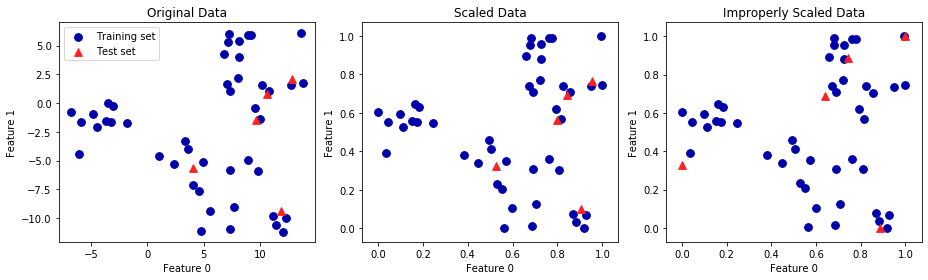

In [10]:
from sklearn.datasets import make_blobs
# make synthetic data
X, _ = make_blobs(n_samples=50, centers=5, random_state=4, cluster_std=2)
# split it into training and test sets
X_train, X_test = train_test_split(X, random_state=5, test_size=.1)

# plot the training and test sets
fig, axes = plt.subplots(1, 3, figsize=(13, 4))
axes[0].scatter(X_train[:, 0], X_train[:, 1],
                c=mglearn.cm2(0), label="Training set", s=60)
axes[0].scatter(X_test[:, 0], X_test[:, 1], marker='^',
                c=mglearn.cm2(1), label="Test set", s=60)
axes[0].legend(loc='upper left')
axes[0].set_title("Original Data")

# scale the data using MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# visualize the properly scaled data
axes[1].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
                c=mglearn.cm2(0), label="Training set", s=60)
axes[1].scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], marker='^',
                c=mglearn.cm2(1), label="Test set", s=60)
axes[1].set_title("Scaled Data")

# rescale the test set separately
# so test set min is 0 and test set max is 1
# DO NOT DO THIS! For illustration purposes only.
test_scaler = MinMaxScaler()
test_scaler.fit(X_test)
X_test_scaled_badly = test_scaler.transform(X_test)

# visualize wrongly scaled data
axes[2].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
                c=mglearn.cm2(0), label="training set", s=60)
axes[2].scatter(X_test_scaled_badly[:, 0], X_test_scaled_badly[:, 1],
                marker='^', c=mglearn.cm2(1), label="test set", s=60)
axes[2].set_title("Improperly Scaled Data")

for ax in axes:
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
fig.tight_layout()

- 第一张图是未缩放的二维数据集，其中训练集用圆形表示，测试集用三角形表示

- 第二张图中是同样的数据，但使用 MinMaxScaler 缩放
    - 这里调用 fit 作用在训练集上，然后调用 transform 作用在训练集合测试集上
    - 第二张图中的数据集看起来与第一张图中的完全相同，只是坐标轴发生了变化，现在所有特征都位于 0 到 1 之间
    - 还可以发现测试数据（三角形）的特征最大值和最小值并不是 1 和 0

- 第三张图展示了如果对训练集和测试集分别进行缩放
    - 在这种情况下，对训练集和测试集而言，特征的最大值和最小值都是 1 和 0
    - 现在数据集看起来不一样，测试集相对训练集的移动不一致，因为它们分别做了不同的缩放，随意改变了数据的排列

#### The effect of preprocessing on supervised learning

现在回到 cancer 数据集，观察使用 MinMaxScaler 对学习 SVC 的作用，为了对比，再次在原始数据上拟合 SVC

In [11]:
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    random_state=0)

svm = SVC(C=100)
svm.fit(X_train, y_train)
print("Test set accuracy: {:.2f}".format(svm.score(X_test, y_test)))

Test set accuracy: 0.63


下面先用 MinMaxScaler 对数据进行缩放，然后再拟合 SVC

In [12]:
# preprocessing using 0-1 scaling
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# learning an SVM on the scaled training data
svm.fit(X_train_scaled, y_train)

# scoring on the scaled test set
print("Scaled test set accuracy: {:.2f}".format(
    svm.score(X_test_scaled, y_test)))

Scaled test set accuracy: 0.97


正如上面所见，数据缩放的作用非常显著，虽然数据缩放不涉及任何复杂的数学，但良好的做法仍然是使用 scikit-learn 提供的缩放机制，而不是自己重新实现它们


你也可以通过改变使用的类将一种预处理算法轻松替换成另一种，因为所有的预处理都具有相同的接口，都包含 fit 和 transform 方法

In [13]:
# preprocessing using zero mean and unit variance scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# learning an SVM on the scaled training data
svm.fit(X_train_scaled, y_train)

# scoring on the scaled test set
print("SVM test accuracy: {:.2f}".format(svm.score(X_test_scaled, y_test)))

SVM test accuracy: 0.96


可以看到，数据缩放的作用非常显著，更换预处理算法也是非常轻松简单

### Principal Component Analysis (PCA)

主成分分析（principal component analysis，PCA）是一种旋转数据集的方法，**旋转后的特征在统计上不相关**
- 在做完这种旋转之后，通常是根据新特征对解释数据的重要性来选择它的一个子集
- 用于 **降维（Dimensionality Reduction）**

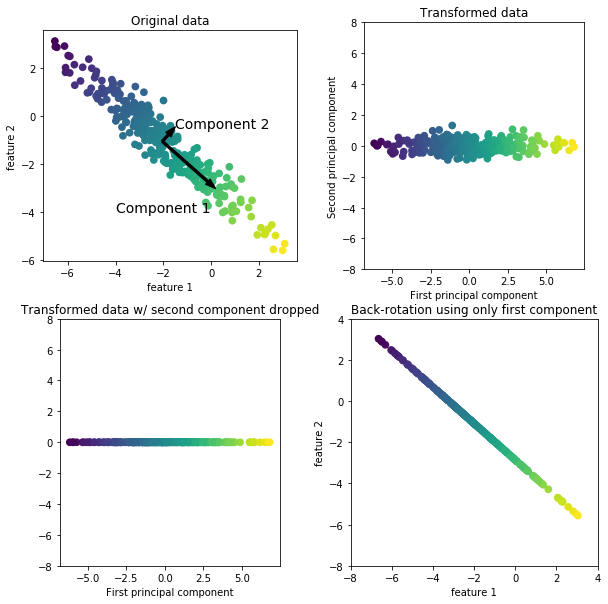

In [14]:
mglearn.plots.plot_pca_illustration()

上面的四张图显示了PCA算法降维的过程


- 第一张图（左上）显示的是原始数据点，用不同颜色加以区分
    - 算法首先找到方差最大的方向，将其标记为“成分1”（component 1），这是数据中包含最多信息的方向（或向量），沿着这个方向的特征之间最为相关
    - 然后，算法找到与第一个方向正交（成直角）且包含最多信息的方向，在二维空间中，只有一个成直角的方向，但在更高维的空间中会有（无穷）多的正交方向
    - 虽然这两个成分都画成箭头，但其头尾的位置并不重要，也可以将第一个成分画成从中心指向左上，而不是指向右下
    - 利用这一过程找到的方向称为主成分（principal component），因为它们是数据方差的主要方向
    - 一般来说，主成分的个数与原始特征相同

- 第二张图显示的是同样的数据，但现在将其旋转，使得第一主成分与 x 轴平行且第二主成分与 y 轴平行
    - 在旋转之前，从数据中减去平均值，使得变换后的数据以零为中心，在 PCA 找到的旋转表示中，两个坐标轴是不相关的，对于这种数据表示，除了对角线，相关矩阵全部为零
    - 可以通过仅保留一部分主成分来使用 PCA 进行降维

- 在这个例子中，可以仅保留第一个主成分，正如第三张图所示（左下），这将数据从二维数据降为一维数据集
    - 注意，没有保留原始特征之一，而是找到了最有趣的成分（第一张图中从左上到右下）并保留这一方向，即第一主成分

- 最后，可以反向旋转并将平均值重新加到数据中，这样会得到上面最后一张图的数据
    - 这些数据点位于原始特征空间中，但仅保留了第一主成分中包含的信息
    - 这种变换有时用于去除数据中的噪声影响，或者将主成分中保留的那部分信息可视化

#### Applying PCA to the cancer dataset for visualization

PCA 最常见的应用之一就是将高维数据集可视化,对于两个以上特征的数据，很难绘制散点图
- 对于Iris（鸢尾花）数据集，可以创建散点图矩阵，通过展示特征所有可能的两两组合来表示数据的局部图像
- 但如果想要查看乳腺癌数据集，即使用散点图矩阵也很困难，这个数据集包含 30 个特征，这就导致需要绘制 30*14=420 张散点图！这就不可能仔细观察所有这些图像，更不用说试图理解它们了

不过可以使用一种更简单的可视化方法 —— 对每个特征分别计算两个类别（良性肿瘤和恶性肿瘤）的直方图

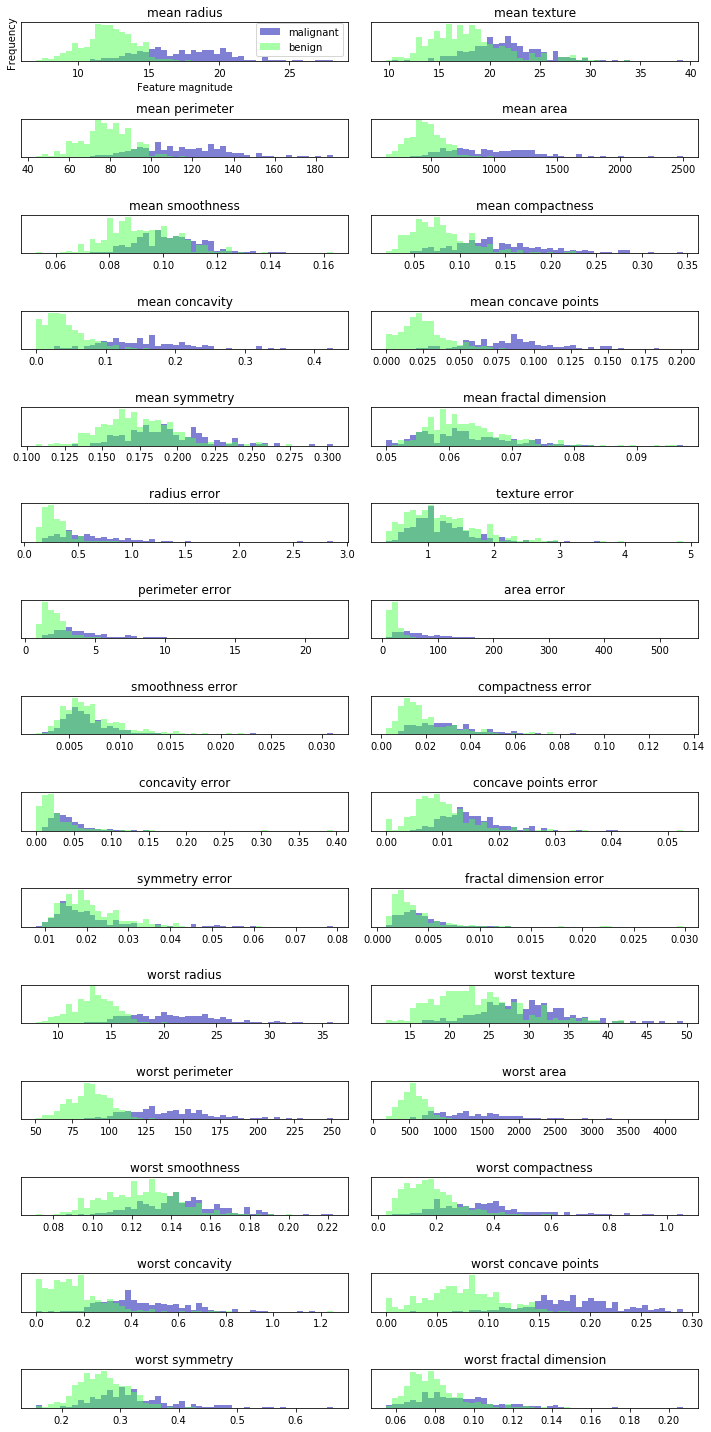

In [15]:
fig, axes = plt.subplots(15, 2, figsize=(10, 20))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]

ax = axes.ravel()

for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins=50)
    ax[i].hist(malignant[:, i], bins=bins, color=mglearn.cm3(0), alpha=.5)
    ax[i].hist(benign[:, i], bins=bins, color=mglearn.cm3(2), alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
ax[0].set_xlabel("Feature magnitude")
ax[0].set_ylabel("Frequency")
ax[0].legend(["malignant", "benign"], loc="best")
fig.tight_layout()

这里为每个特征创建一个直方图，计算具有某一特征的数据点在特定范围内（叫作 `bins`）的出现概率
- 每张图都包含两个直方图，一个是良性类别的所有点（绿色），一个是恶性类别的所有点（蓝色）
- 这样可以了解每个特征在两个类别中的分布情况，也可以猜测哪些特征能够更好地区分良性样本和恶性样本
    - 例如，“smoothness error” 特征似乎没有什么信息量，因为两个直方图大部分都重叠在一起，而 “worst concave points” 特征看起来信息量相当大，因为两个直方图的交集很小
- 但是，这种图无法展示变量之间的相互作用以及这种相互作用与类别之间的关系

利用 PCA，可以获取到主要的相互作用，并得到稍微完整的图像，可以找到前两个主成分，并在这个新的二维空间中利用散点图将数据可视化

在应用 PCA 之前，利用 StandardScaler 缩放数据，使每个特征的方差均为 1

In [16]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

学习并应用 PCA 变换与应用预处理变换一样简单
- 将 PCA 对象实例化，调用 fit 方法找到主成分，然后调用 transform 来旋转并降维
- 默认情况下，PCA 仅旋转（并移动）数据，但保留所有的主成分
- 为了降低数据的维度，需要在创建 PCA 对象时指定想要保留的主成分个数

In [17]:
from sklearn.decomposition import PCA
# keep the first two principal components of the data
pca = PCA(n_components=2)
# fit PCA model to beast cancer data
pca.fit(X_scaled)

# transform data onto the first two principal components
X_pca = pca.transform(X_scaled)
print("Original shape: {}".format(str(X_scaled.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))

Original shape: (569, 30)
Reduced shape: (569, 2)


现在可以对前两个主成分作图

Text(0, 0.5, 'Second principal component')

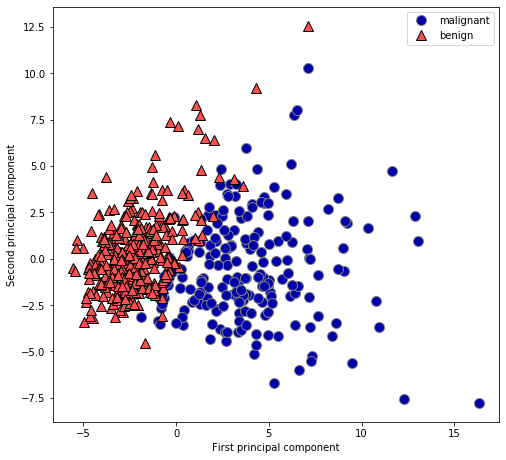

In [18]:
# plot first vs. second principal component, colored by class
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target)
plt.legend(cancer.target_names, loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

- 重要的是要注意，PCA 是一种无监督方法，在寻找旋转方向时没有用到任何类别信息，它只是观察数据中的相关性
    - 对于这里所示的散点图，绘制了第一主成分与第二主成分的关系，然后利用类别信息对数据点进行着色。
    - 在这个二维空间中两个类别被很好地分离，即使是线性分类器（在这个空间中学习一条直线）也可以在区分这两个类别时表现得相当不错
    - 还可以看到，恶性点比良性点更加分散，这一点也可以之前的直方图中看出来

- PCA 的一个缺点在于，通常不容易对图中的两个轴做出解释
    - 主成分对应于原始数据中的方向，所以它们是原始特征的组合，但这些组合往往非常复杂
    - 在拟合过程中，主成分被保留在 PCA 对象的 `components_` 属性中

In [19]:
print("PCA component shape: {}".format(pca.components_.shape))

PCA component shape: (2, 30)


`components_` 的每一行对应于一个主成分，它们按重要性（第一主成分排在首位，以此类推），列对应于 PCA 的原始特征属性，在本例中即为 “mean radius”，“mean texture” 等

查看 `components_` 的内容

In [20]:
print("PCA components:\n{}".format(pca.components_))

PCA components:
[[ 0.219  0.104  0.228  0.221  0.143  0.239  0.258  0.261  0.138  0.064
   0.206  0.017  0.211  0.203  0.015  0.17   0.154  0.183  0.042  0.103
   0.228  0.104  0.237  0.225  0.128  0.21   0.229  0.251  0.123  0.132]
 [-0.234 -0.06  -0.215 -0.231  0.186  0.152  0.06  -0.035  0.19   0.367
  -0.106  0.09  -0.089 -0.152  0.204  0.233  0.197  0.13   0.184  0.28
  -0.22  -0.045 -0.2   -0.219  0.172  0.144  0.098 -0.008  0.142  0.275]]


还可以用热图将系数可视化

Text(0, 0.5, 'Principal components')

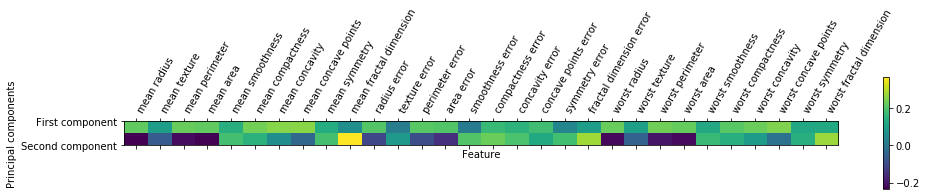

In [21]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ["First component", "Second component"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),
           cancer.feature_names, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")

- 在第一个主成分中，所有特征的符号相同（均为正，但前面提到过，箭头指向哪个方向无关紧要），这意味着在所有特征之间存在普遍的相关性，如果一个测量值较大的话，其他的测量值可能也较大
- 第二个主成分的符号有正有负
- 两个主成分都包含所有 30 个特征，这种所有特征的混合使得解释上图中的坐标轴变的十分困难
- 对于二分类的问题，通过降维可以在最大的主成分上就呈现良好的效果

### Non-Negative Matrix Factorization (NMF)

- **非负矩阵分解（non-negative matrix facrorization，NMF）** 是另一种无监督学习算法，其目的在于提取有用的特征
    - 工作原理类似于 PCA，也可以用于降维
    - 与 PCA 相同，试图将每个数据点写成一些分量的加权求和
    - 在 PCA 中，想要的是正交分量，并且能够解释尽可能多的数据方差；而在 NMF 中，希望分量和系数均为非负
    - NMF 方法只能应用于每个特征都是非负的数据，因为非负分量的非负求和不可能变为负值

- 将数据分解成非负加权求和的这个过程，对由多个独立源相加（或叠加）创建而成的数据特别有用
    - 比如多人说话的音轨或包含多种乐器的音乐，NMF 可以识别出组成合成数据的原始分量
    - 与 PCA 相比，NMF 得到的分量更容易解释，因为负的分量和系数可能导致难以解释的 **抵消效应（cancellation effect）**

- **反向变换的数据质量** 与使用 PCA 时类似，但要稍差一些
    - 因为 PCA 找到的是重建的最佳方向
    - NMF 通常并不用于对数据进行重建或编码，而是用于在数据中寻找有趣的模式

#### Applying NMF to synthetic data

- 与使用 PCA 不同，需要保证数据是正的，NMF 才能够对数据进行操作
- 这说明数据相对于原点 (0,0) 的位置实际上对 NMF 很重要，因此，可以将提取出来的非负分量看作是从（0,0）到数据的方向。

下面给出 NMF 对二维玩具数据上的结果

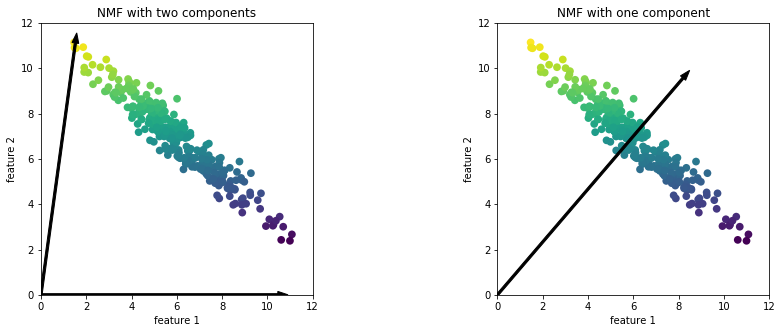

In [22]:
mglearn.plots.plot_nmf_illustration()

- 对于两个分量的 NMF（如上左图所示），显然所有数据点都可以写成两个分量的正数组合
    - 如果有足够多的分量能够完美地重建数据（分量个数与特征个数相同），那么算法会选择指向数据极值的方向
- 如果仅使用一个分量，那么 NMF 会创建一个指向平均值的分量，因为指向这里可以对数据做出最好的解释
    - 与 PCA 不同，减少分量个数不仅会删除一些方向，而且会创建一组完全不同的分量！
    - NMF 的分量也没有按任何特定方法排序，所以不存在 “第一非负分量”: 所有分量的地位平等
- NMF 使用了随机初始化，根据随机种子的不同可能会产生不同的结果
    - 在相对简单的情况下（比如两个分量的模拟数据），所有数据都可以被完美地解释，那么随机性的影响很小（虽然可能会影响分量的顺序或尺度）
    - 在更加复杂的情况下，影响可能会很大

#### Applying NMF to decompose 3 different signal sources for superposition

假设一个信号是由三个不同信号源合成的

Text(0, 0.5, 'Signal')

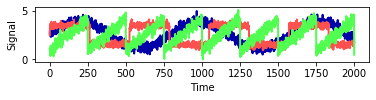

In [23]:
S = mglearn.datasets.make_signals()
plt.figure(figsize=(6, 1))
plt.plot(S, '-')
plt.xlabel("Time")
plt.ylabel("Signal")

此时无法观测到原始信号，只能观测到三个信号的叠加信号，但是又想将混合信号分解为原始信号

假设有许多不同的方法来观测混合信号（比如有 100 台测量装置），每种方法都提供了一系列测量结果

In [24]:
# Mix data into a 100 dimensional state
A = np.random.RandomState(0).uniform(size=(100, 3))
X = np.dot(S, A.T)
print("Shape of measurements: {}".format(X.shape))

Shape of measurements: (2000, 100)


可以用 NMF 来还原这三个信号

In [25]:
from sklearn.decomposition import NMF
nmf = NMF(n_components=3, random_state=42)
S_ = nmf.fit_transform(X)
print("Recovered signal shape: {}".format(S_.shape))

Recovered signal shape: (2000, 3)


应用 PCA 来对比查看 

In [26]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
H = pca.fit_transform(X)

使用 NMF 和 PCA 发现信号

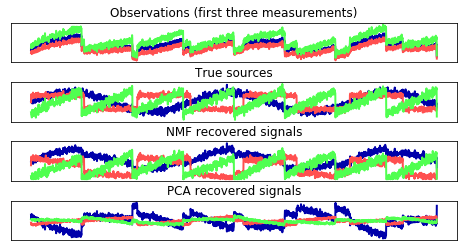

In [27]:
models = [X, S, S_, H]
names = ['Observations (first three measurements)',
         'True sources',
         'NMF recovered signals',
         'PCA recovered signals']

fig, axes = plt.subplots(4, figsize=(8, 4), gridspec_kw={'hspace': .5},
                         subplot_kw={'xticks': (), 'yticks': ()})

for model, name, ax in zip(models, names, axes):
    ax.set_title(name)
    ax.plot(model[:, :3], '-')

- 图片中包含来自 X 的 100 次测量中的 3 次，用于参考
- NMF 在发现原始信号源时得到了不错的结果，而仅使用第一个成分来解释数据中的大部分变化的 PCA 则失败了
- NMF 生成的分量是没有顺序的，在这个例子中，NMF 分量的顺序与原始信号完全相同（参见三条曲线的颜色），但这纯属偶然

还有许多其他算法可以用于将每个数据点分解为一系列固定分量的加权求和，比如独立成分分析（ICA）、因子分析（FA）和稀疏编码（字典学习）等内容

#### Manifold Learning with t-SNE

- 虽然 PCA 通常是用于变换数据的首选方法，使你能够用散点图将其可视化，但这一方法的性质（先旋转然后减少方向）限制了其有效性
    - 有一类用于可视化的算法叫做 **流形学习算法（namifold learning algorithm）**，它允许进行更复杂的映射，通常也可以给出更好地可视化
    - 其中特别有用的就是 **t-SNE 算法**

- 流形学习算法主要用于可视化，因此很少用来生成两个以上的新特征
    - 其中一些算法（包括t-SNE）计算训练数据的一种新表示，但不允许变换新数据
    - 所以这些算法不能用于测试集：更确切地说，他们只能变换用于训练的数据

- t-SNE 背后的思想是 **找到数据的一个二维表示**，尽可能地保持数据点之间的距离
    - 尝试让原始特征空间中距离较近的点更加靠近，原始特征空间中相距较远的点更加远离，试图保存那些表示哪些点比较靠近的信息

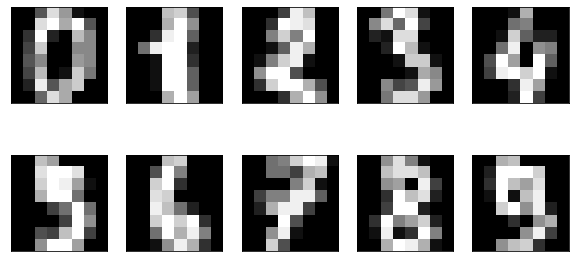

In [28]:
from sklearn.datasets import load_digits
digits = load_digits()

fig, axes = plt.subplots(2, 5, figsize=(10, 5),
                         subplot_kw={'xticks':(), 'yticks': ()})
for ax, img in zip(axes.ravel(), digits.images):
    ax.imshow(img)

用 PCA 将降到二维的数据可视化，对前两个主成分作图，并按类别对数据点着色

Text(0, 0.5, 'Second principal component')

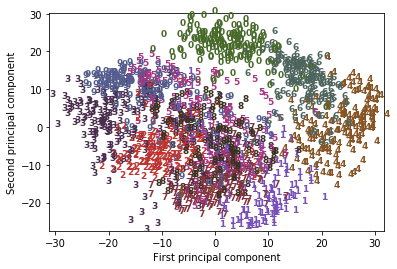

In [29]:
# build a PCA model
pca = PCA(n_components=2)
pca.fit(digits.data)
# transform the digits data onto the first two principal components
digits_pca = pca.transform(digits.data)
colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
          "#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E"]
plt.xlim(digits_pca[:, 0].min(), digits_pca[:, 0].max())
plt.ylim(digits_pca[:, 1].min(), digits_pca[:, 1].max())
for i in range(len(digits.data)):
    # actually plot the digits as text instead of using scatter
    plt.text(digits_pca[i, 0], digits_pca[i, 1], str(digits.target[i]),
            color = colors[digits.target[i]], fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

实际上，这里用每个类别对应的数字作为符号来显示每个类别的位置
- 利用前两个主成分可以将数字 0、6 和 4 比较好地分开，尽管仍有重叠
- 大部分其他数字都大量重叠在一起

将 t-SNE 应用于同一数据集，并对结果进行比较
- 由于 t-SNE 不支持变换新数据，所以 TSNE 类没有 transform 方法
- 可以调用 fit_transform 方法来代替，它会构建模型并立刻返回变换后的数据

In [30]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=42)
# use fit_transform instead of fit, as TSNE has no transform method
digits_tsne = tsne.fit_transform(digits.data)

Text(0, 0.5, 't-SNE feature 1')

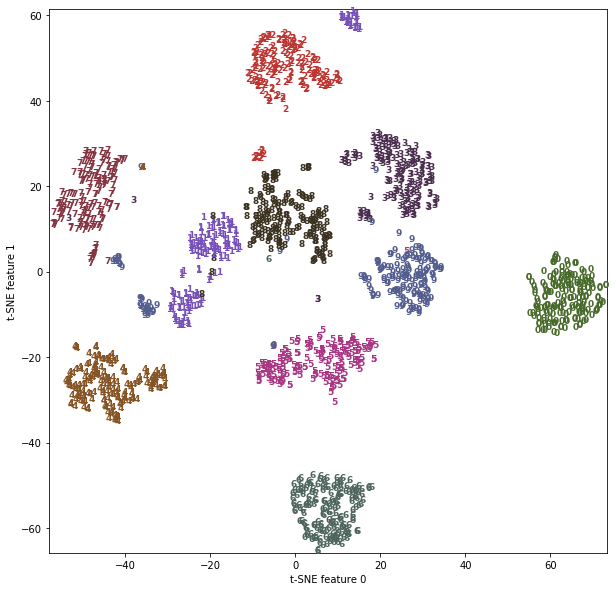

In [31]:
plt.figure(figsize=(10, 10))
plt.xlim(digits_tsne[:, 0].min(), digits_tsne[:, 0].max() + 1)
plt.ylim(digits_tsne[:, 1].min(), digits_tsne[:, 1].max() + 1)
for i in range(len(digits.data)):
    # actually plot the digits as text instead of using scatter
    plt.text(digits_tsne[i, 0], digits_tsne[i, 1], str(digits.target[i]),
             color = colors[digits.target[i]],
             fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("t-SNE feature 0")
plt.ylabel("t-SNE feature 1")

- t-SNE 的结果非常棒。所有类别都被明确分开
    - 数字1和9被分成几块，但大多数类别都形成一个密集的组
    - 这种方法并不知道类别标签，它完全是无监督的
    - 但它能够找到数据的一种二维表示，仅根据原始空间中数据点之间的靠近程度就能够将各个类别明确分开
- t-SNE 算法有一些调节参数，虽然默认参数的效果通常就很好
    - 可以尝试修改 `perplexity` 和 `early_exaggeration`，但作用一般很小

### k-Means clustering

聚类（clustering）是将数据集划分成组的任务，这些组叫作簇（cluster），其目标是划分数据，使得一个簇内的数据点相似且不同簇内的数据点非常不同，与分类算法类似，聚类算法为每个数据点分配（或预测）一个数字，表示这个点属于哪个簇

k 均值聚类是最简单也最常用的聚类算法之一
- 它试图找到代表数据特定区域的簇中心（cluster certer）
- 算法交替执行以下两个步骤: 将每个数据点分配给最近的簇中心，然后将每个簇中心设置为所分配的所有数据点的平均值
- 如果簇的分配不再发生变化，那么算法结束

下面在一个模拟数据集上对这一算法进行说明

#### k-Means in a simulate dataset

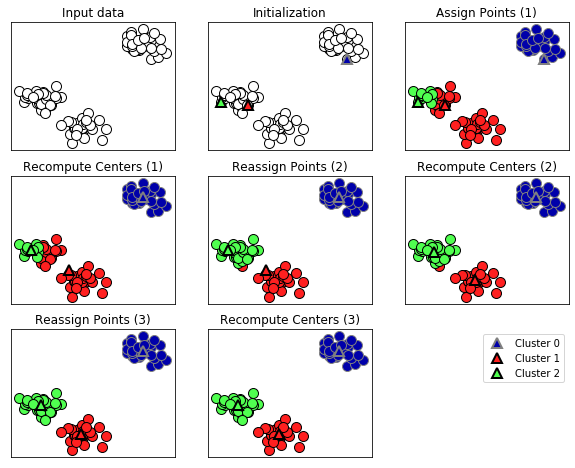

In [32]:
mglearn.plots.plot_kmeans_algorithm()

- 簇中心用三角形表示，而数据点用圆形表示，颜色表示簇成员
- 指定要寻找三个簇，所以通过声明三个随机数据点为簇中心来将算法初始化，然后开始迭代算法
    - 首先，每个数据点被分配给距离最近的簇中心
    - 接下来，将簇中心修改为所分配点的平均值
    - 然后将这一个过程再重复两次
    - 在第三次迭代之后，为簇中心分配的数据点保持不变，因此算法结束
- 给定新的数据点，k 均值聚类将其分配给最近的簇中心

下面展示学到的簇中心边界

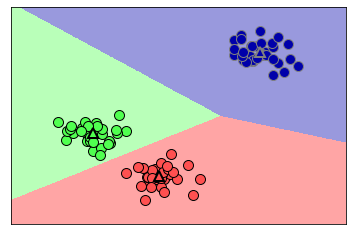

In [33]:
mglearn.plots.plot_kmeans_boundaries()

用 sickit-learn 应用 k 均值相当简单
- 将 KMeans 类实例化，并设置要寻找的簇个数
- 然后对数据调用 fit 方法

In [34]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# generate synthetic two-dimensional data
X, y = make_blobs(random_state=1)

# build the clustering model
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

算法运行期间，为 X 中的每个训练数据点分配一个簇标签，可以在 `kmeans.lables_` 属性中找到这些标签

In [35]:
print("Cluster memberships:\n{}".format(kmeans.labels_))

Cluster memberships:
[1 2 2 2 0 0 0 2 1 1 2 2 0 1 0 0 0 1 2 2 0 2 0 1 2 0 0 1 1 0 1 1 0 1 2 0 2
 2 2 0 0 2 1 2 2 0 1 1 1 1 2 0 0 0 1 0 2 2 1 1 2 0 0 2 2 0 1 0 1 2 2 2 0 1
 1 2 0 0 1 2 1 2 2 0 1 1 1 1 2 1 0 1 1 2 2 0 0 1 0 1]


因为要找的是 3 个簇，所以簇的编号是 0 到 2

也可以用 predict 方法为新数据点分配簇标签
- 预测时会将最近的簇中心分配给每个新数据点，但现有模型不会改变
- 对训练集运行 predict 会返回与 labels_ 相同的结果

In [36]:
print(kmeans.predict(X))

[1 2 2 2 0 0 0 2 1 1 2 2 0 1 0 0 0 1 2 2 0 2 0 1 2 0 0 1 1 0 1 1 0 1 2 0 2
 2 2 0 0 2 1 2 2 0 1 1 1 1 2 0 0 0 1 0 2 2 1 1 2 0 0 2 2 0 1 0 1 2 2 2 0 1
 1 2 0 0 1 2 1 2 2 0 1 1 1 1 2 1 0 1 1 2 2 0 0 1 0 1]


- 聚类算法与分类算法有些相似，每个元素都有一个标签,但不存在真实的标签，因此标签本身并没有先验意义
- 对于刚刚在二维玩具数据集上运行的聚类算法，这意味着不应该为其中一组的标签是 0、另一组的标签是 1 这一事实赋予任何意义，再次运行该算法可能会得到不同的簇编号，原因在于初始化的随机性质

可以查看刚才模拟数据集的标签，簇中心被保存在 `cluster_centers_` 属性中，用三角形表示它们

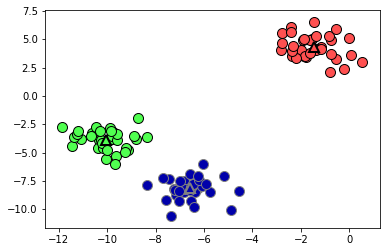

In [37]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], [0, 1, 2],
    markers='^', markeredgewidth=2)

也可以使用更多或更少的簇中心

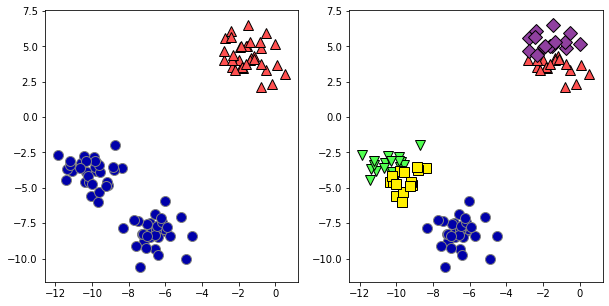

In [38]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# using two cluster centers:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
assignments = kmeans.labels_

mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[0])

# using five cluster centers:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
assignments = kmeans.labels_

mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[1])

#### Failure cases of k-Means

- 即使知道给定数据集中簇的“正确”个数，k 均值可能也不是总能找到它们
- 每个簇仅由其中心定义，这意味着每个簇都是凸形（convex），因此，k 均值只能找到相对简单的形状
- k 均值还假设所有簇在某种程度上具有相同的“直径”，它总是将簇之间的边界刚好画在簇中心的中间位置

Text(0, 0.5, 'Feature 1')

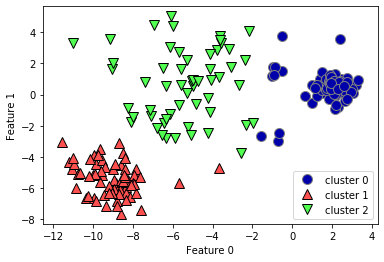

In [39]:
X_varied, y_varied = make_blobs(n_samples=200,
                                cluster_std=[1.0, 2.5, 0.5],
                                random_state=170)
y_pred = KMeans(n_clusters=3, random_state=0).fit_predict(X_varied)

mglearn.discrete_scatter(X_varied[:, 0], X_varied[:, 1], y_pred)
plt.legend(["cluster 0", "cluster 1", "cluster 2"], loc='best')
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

左下方的密集区是第一个簇，右上方的密集区是第二个，中间密度较小的区域是第三个，但事实上，簇 0 和簇 1 都包含一些远离簇中其他点的点

k 均值还假设所有方向对每个簇同等重要，如下显示了一个二维数据集，数据中包含明确分开的三部分，但是这三部分被沿着对角线方向拉长，由于 k 均值仅考虑到最近簇中心的距离，所以它无法处理这种类型的数据

Text(0, 0.5, 'Feature 1')

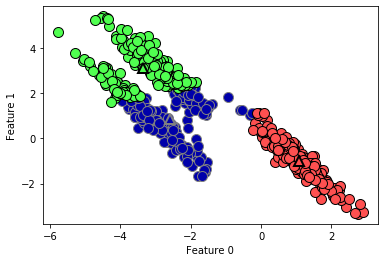

In [40]:
# generate some random cluster data
X, y = make_blobs(random_state=170, n_samples=600)
rng = np.random.RandomState(74)

# transform the data to be stretched
transformation = rng.normal(size=(2, 2))
X = np.dot(X, transformation)

# cluster the data into three clusters
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_pred = kmeans.predict(X)

# plot the cluster assignments and cluster centers
mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], [0, 1, 2],
    markers='^', markeredgewidth=2)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

如果簇的形状更加复杂，那么 k 均值表现也很差

Text(0, 0.5, 'Feature 1')

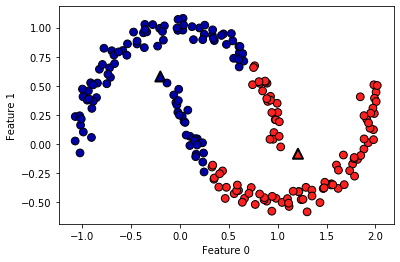

In [41]:
# generate synthetic two_moons data (with less noise this time)
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# cluster the data into two clusters
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_pred = kmeans.predict(X)

# plot the cluster assignments and cluster centers
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=mglearn.cm2, s=60, edgecolor='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            marker='^', c=[mglearn.cm2(0), mglearn.cm2(1)], s=100, linewidth=2,
            edgecolor='k')
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

上图中，希望聚类算法能够发现两个半月形，但利用 k 均值算法是不可能做到这一点的

#### Vector Quantization - Or Seeing k-Means as Decomposition

虽然 k 均值是一种聚类算法，但在 k 均值和分解方法（比如 PCA 和 NMF）之间存在一些有趣的共同之处
- PCA 试图找到数据中方差最大的方向，而 NMF 试图找到累加的分量，这通常对应与数据的“极值”和“部分”，两种方法都试图将数据点表示为一些分量之和
- 与此相反，k 均值则尝试利用簇中心来表示每个数据点，可以将其看作仅用一个分量来表示每个数据点，该分量由簇中心给出
    - 这种观点将 k 均值看作是一种分解方法，其中每个点利用单一分量来表示，这种观点被称为 **矢量化（vector quantization）**

并排比较 PCA、NMF 和 k 均值，分别显示提取的分量，以及利用 100 个分量对数据集中人脸的重建
- 对于 k 均值，重建就是在训练集中找到的最近的簇中心

利用 k 均值做矢量量化的一个有趣之处在于，可以用比输入维度更多的簇来对数据进行编码

对于 two_moons 数据，使用 PCA 或 NMF 对这个数据无能为力，因为它只有两个维度，使用 PCA 或 NMF 将其降到一维，将会完全破坏数据的结构，但通过使用更多的簇中心，可以用 k 均值找到一种更具表现力的表示

Cluster memberships:
[9 2 5 4 2 7 9 6 9 6 1 0 2 6 1 9 3 0 3 1 7 6 8 6 8 5 2 7 5 8 9 8 6 5 3 7 0
 9 4 5 0 1 3 5 2 8 9 1 5 6 1 0 7 4 6 3 3 6 3 8 0 4 2 9 6 4 8 2 8 4 0 4 0 5
 6 4 5 9 3 0 7 8 0 7 5 8 9 8 0 7 3 9 7 1 7 2 2 0 4 5 6 7 8 9 4 5 4 1 2 3 1
 8 8 4 9 2 3 7 0 9 9 1 5 8 5 1 9 5 6 7 9 1 4 0 6 2 6 4 7 9 5 5 3 8 1 9 5 6
 3 5 0 2 9 3 0 8 6 0 3 3 5 6 3 2 0 2 3 0 2 6 3 4 4 1 5 6 7 1 1 3 2 4 7 2 7
 3 8 6 4 1 4 3 9 9 5 1 7 5 8 2]


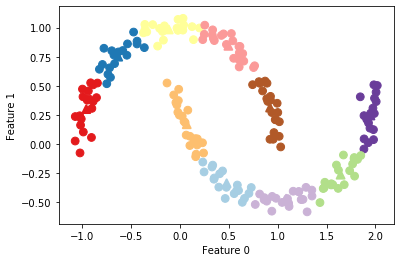

In [42]:
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

kmeans = KMeans(n_clusters=10, random_state=0)
kmeans.fit(X)
y_pred = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=60, cmap='Paired')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=60,
            marker='^', c=range(kmeans.n_clusters), linewidth=2, cmap='Paired')
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
print("Cluster memberships:\n{}".format(y_pred))

- 使用了 10 个簇中心，现在每个点都被分配了 0 到 9 之间的一个数字，可以将其看作是 10 个分量表示的数据（有 10 个新特征），只有表示该点对应的簇中心特征不为 0，其他特征均为 0
- 利用这个 10 维表示，现在可以用线性模型来划分两个半月形，而利用原始的两个特征是不可能做到这一点

将到每个簇中心的距离作为特征，还可以得到一种表现力更强的数据表示，可以利用 kmeans 的 transform 方法来完成这一点

In [43]:
distance_features = kmeans.transform(X)
print("Distance feature shape: {}".format(distance_features.shape))
print("Distance features:\n{}".format(distance_features))

Distance feature shape: (200, 10)
Distance features:
[[0.922 1.466 1.14  ... 1.166 1.039 0.233]
 [1.142 2.517 0.12  ... 0.707 2.204 0.983]
 [0.788 0.774 1.749 ... 1.971 0.716 0.944]
 ...
 [0.446 1.106 1.49  ... 1.791 1.032 0.812]
 [1.39  0.798 1.981 ... 1.978 0.239 1.058]
 [1.149 2.454 0.045 ... 0.572 2.113 0.882]]


- k 均值是非常流行的聚类算法，因为它不仅相对容易理解和实现，而且运行速度也相对较快
- k 均值可以轻松扩展到大型数据集，scikit-learn 甚至在MiniBatchMeans 类中包含了一种更具可扩展性的变体，可以处理非常大的数据集
- k 均值的缺点在于
    - 依赖于随机初始化，即算法的输出依赖于随机种子，默认情况下，scikit-learn 用 10 种不同的随机初始化将算法运行 10 次，并返回最佳结果
    - k 均值还有一个缺点，就是对簇形状的假设的约束性较强，而且还要求指定所要寻找的簇的个数 （在现实世界的应用中可能并不知道这个数字）

### Agglomerative clustering

**凝聚聚类（agglomerative clustering）** 指的是许多基于相同原则构建的聚类算法
- 算法首先声明每个点是自己的簇，然后合并两个最相似的簇，直到满足某种停止准则为止
- scikit-learn 中实现的停止准则是簇的个数，因此相似的簇被合并，直到仅剩下指定个数的簇
- 链接(linkage)准则，规定如何度量“最相似的簇”，这种度量总是定义在两个现有的簇之间，scikit-learn 中实现了以下三种选项
    - `ward`: 默认选项，`ward` 挑选两个簇来合并，使得所有簇中方差增加最小，这通常会得到大小差不多相等的簇
    - `average` 链接将簇中所有点之间平均距离最小的两个簇合并
    - `complete` 链接（也称为最大链接）将簇中点之间最大距离最小的两个簇合并

`ward` 适用于大多数数据集，如果簇中的成员个数非常不同（比如其中一个比其他所有都大得多），那么 `average` 或 `complete` 可能效果更好

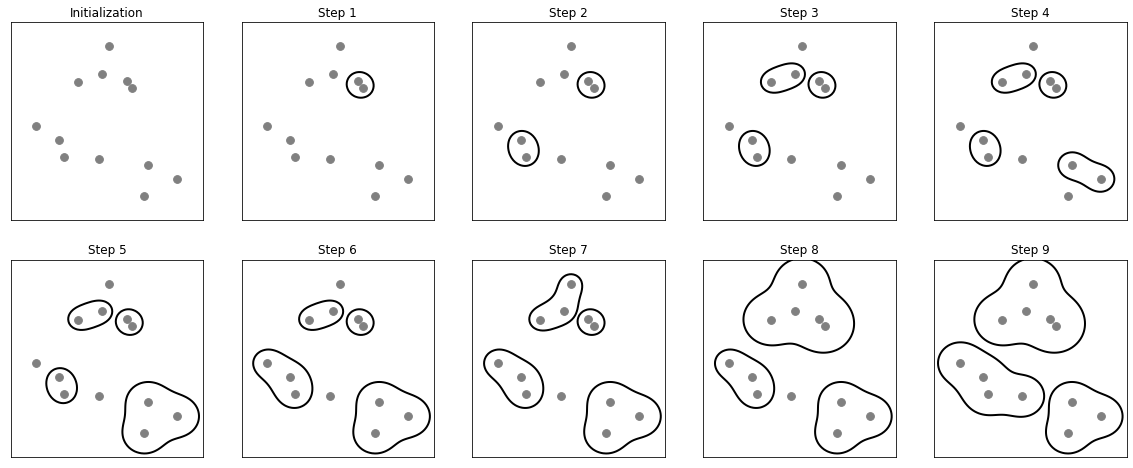

In [44]:
mglearn.plots.plot_agglomerative_algorithm()

看一下凝聚聚类对上面的三簇数据的效果如何

由于算法的工作原理，凝聚聚类不能对新数据点做出预测，因此 AgglomerativeClustering 没有 `predict` 方法，为了构造模型并得到训练集上簇的成员关系，可以改用 `fit_predict` 方法，结果如下

Text(0, 0.5, 'Feature 1')

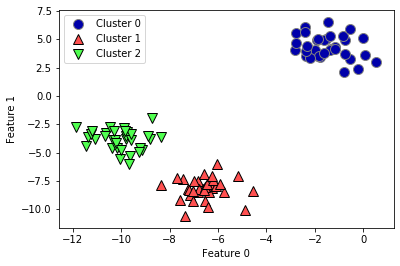

In [45]:
from sklearn.cluster import AgglomerativeClustering
X, y = make_blobs(random_state=1)

agg = AgglomerativeClustering(n_clusters=3)
assignment = agg.fit_predict(X)

mglearn.discrete_scatter(X[:, 0], X[:, 1], assignment)
plt.legend(["Cluster 0", "Cluster 1", "Cluster 2"], loc="best")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

凝聚聚类算法完美地完成了聚类，虽然凝聚聚类的 sikit-learn 实现需要指定希望算法找到的簇的个数，但凝聚聚类方法为选择正确的个数提供了一些帮助

#### Hierarchical Clustering and Dendrograms

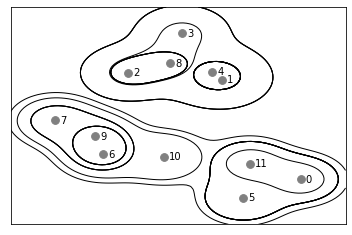

In [46]:
mglearn.plots.plot_agglomerative()

- 虽然这种可视化为层次聚类提供了非常详细地视图，但它依赖于数据的二维性质，因此不能用于具有两个以上特征的数据集
- 还有另一个将层次聚类可视化的工具，叫作树状图（dendrogram）,它可以处理多维数据集

借助 Scipy 可以绘制树状图

Text(0, 0.5, 'Cluster distance')

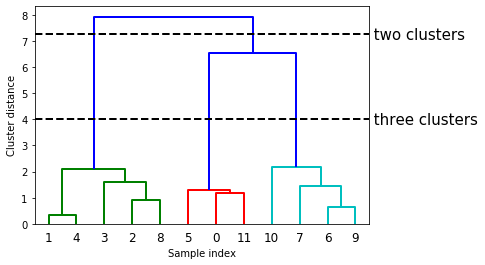

In [47]:
# Import the dendrogram function and the ward clustering function from SciPy
from scipy.cluster.hierarchy import dendrogram, ward

X, y = make_blobs(random_state=0, n_samples=12)
# Apply the ward clustering to the data array X
# The SciPy ward function returns an array that specifies the distances
# bridged when performing agglomerative clustering
linkage_array = ward(X)
# Now we plot the dendrogram for the linkage_array containing the distances
# between clusters
dendrogram(linkage_array)

# mark the cuts in the tree that signify two or three clusters
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [7.25, 7.25], '--', c='k')
ax.plot(bounds, [4, 4], '--', c='k')

ax.text(bounds[1], 7.25, ' two clusters', va='center', fontdict={'size': 15})
ax.text(bounds[1], 4, ' three clusters', va='center', fontdict={'size': 15})
plt.xlabel("Sample index")
plt.ylabel("Cluster distance")

### DBSCAN

**DBSCAN(density-based spatial clustering of applications with noise）** 即“具有噪声的基于密度的空间聚类应用”
- DBSCAN 的主要优点是它不需要用户先验地设置簇的个数，可以划分具有复杂形状的簇，还可以找出不属于任何簇的点
    - DBSCAN 比凝聚聚类和 k 均值稍慢，但仍可以扩展到相对较大的数据集
- DBSCAN 的原理是识别特征空间的“拥挤”区域中的点，在这些区域中许多数据点靠近在一起，这些区域被称为特征空间中的密集（dense）区域
    - DBSCAN 背后的思想是，簇形成数据的密集区域，并由相对较空的区域隔开
    - 在密集区域内的点被称为核心样本（core sample,或核心点）
- DBSCAN 有两个参数 `min_samples` 和 `eps` 
    - 如果在距一个给定数据点 `eps` 的距离内至少有 `min_samples` 个数据点，那么这个数据点就是核心样本
    - DBSCAN 将彼此距离小于 `eps` 的核心样本放到同一个簇中

将 DBSCAN 应用于演示凝聚聚类的模拟数据集
- 与凝聚聚类类似，DBSCAN 也不允许对新的测试数据进行预测，将使用 `fit_predict` 方法来执行聚类并返回簇标签

In [48]:
from sklearn.cluster import DBSCAN
X, y = make_blobs(random_state=0, n_samples=12)

dbscan = DBSCAN()
clusters = dbscan.fit_predict(X)
print("Cluster memberships:\n{}".format(clusters))

Cluster memberships:
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


所有数据点都被分配了标签 -1，这代表噪声，这是 `eps` 和 `min_samples` 默认参数设置的结果，对于小型的玩具数据集并没有调节这些参数

`min_samples` 和 `eps` 取不同值时的簇分类如下所示，其可视化结果如下图

min_samples: 2 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 2 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 2 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 2 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 3 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 3 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 3 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 3 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 5 eps: 1.000000  cluster: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 5 eps: 1.500000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 2.000000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]


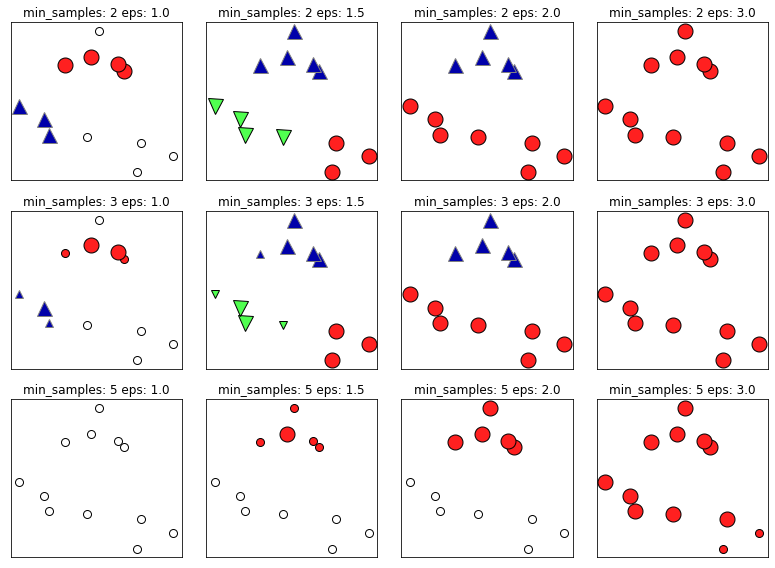

In [49]:
mglearn.plots.plot_dbscan()

在上述图中，属于簇的点是实心的，而噪声点则显示为空心的，核心样本显示为较大的标记，而边界点则显示为较小的标记
- 增大 `eps`（在图中从左到右），更多的点会被包含在一个簇中，这让簇变大，但可能也会导致多个簇合并成一个
- 增大 `min_samples`（在图中从上到下），核心点会变的更少，更多的点被标记为噪声
- 参数 `eps` 在某种程度上更加重要，因为它决定了点与点之间“接近”的含义
    - 将 `eps` 设置得非常小，意味着没有点是核心样本，可能会导致所有点都被标记为噪声
    - 将 `eps` 设置得非常大，可能会导致所有点形成单个簇
- 设置 `min_samples` 主要是为了判断稀疏区域内的点被标记为异常值还是形成自己的簇
    - 如果增大 `min_samples`，任何一个包含少于 `min_samples` 个样本的簇现在将被标记为噪声
    - `min_samples` 决定簇的最小尺寸,在上图中 `eps=1.5` 时，从 `min_samples=3` 到 `min_samples=5` 可以清楚地看到这一点    
        - `min_samples=3` 时有三个簇: 一个包含 4 个点，一个包含 5 个点，一个包含 3 个点
        - `min_samples=5` 时，两个较小的簇（分别包含 3 个点和 4 个点）现在都被标记为噪声，只保留包含 5 个样本的簇
- 虽然 DBSCAN 不需要显示地设置簇的个数，但设置 `eps` 可以隐式地控制找到的簇的个数
    - 使用 `StandardScaler` 或 `MinMaxScaler` 对数据进行缩放之后，有时会更容易找到 `eps` 的较好取值，因为将确保所有特征具有相似的范围

下面将展示在 two_moons 数据集上运行 DBSCAN 的结果，利用默认设置，算法找到了两个半圆形并将其分开

Text(0, 0.5, 'Feature 1')

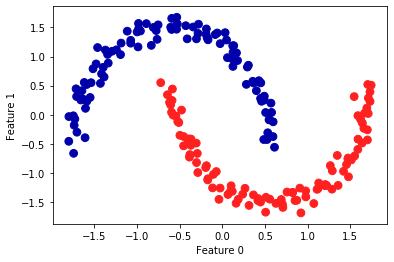

In [50]:
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# Rescale the data to zero mean and unit variance
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

dbscan = DBSCAN()
clusters = dbscan.fit_predict(X_scaled)
# plot the cluster assignments
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm2, s=60)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

由于算法找到了想要的簇的个数（2个），因此参数设置的效果似乎很好
- 如果将 `eps` 减小到 0.2（默认值为 0.5），将会得到 8 个簇，这显然太多了
- 将 `eps` 增大到 0.7 则会导致只有一个簇

在使用 DBSCAN 时，需要谨慎处理返回的簇分配，如果使用簇标签对另一个数据进行索引，那么使用 -1 表示噪声可能会产生意料之外的结果

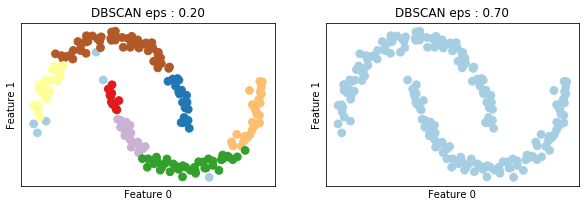

In [51]:
fig, axes = plt.subplots(1, 2, figsize=(10, 3),
                         subplot_kw={'xticks': (), 'yticks': ()})
# make a list of eps to use
eps_diffs = [DBSCAN(eps=0.2), DBSCAN(eps=0.7)]

for ax, eps_diff in zip(axes, eps_diffs):
    clusters = eps_diff.fit_predict(X_scaled)
    # plot the cluster assignments
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='Paired',s=60)
    ax.set_title("DBSCAN eps : {:.2f}".format(eps_diff.eps))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")

#### Comparing and evaluating clustering algorithms


在应用聚类算法时，其挑战之一就是很难评估一个算法的效果好坏，也很难比较不同算法的结果

在讨论完 k 均值、凝聚聚类和 DBSCAN 背后的算法之后，下面将在一些现实世界的数据集上比较它们

#### Evaluating clustering with ground truth

有一些指标可用于评估聚类算法相对于真实聚类的结果，其中最重要的是 **调整 rand 指数（adjusted rand index,ARI）** 和 **归一化互信息（normalized mutual information,NMI）**，二者都给出了定量的度量，其最佳值为 1, 0 表示不相关的聚类（虽然 ARI 可以取负值）

下面使用 ARI 来比较 k 均值，凝聚聚类和 DBSCAN 算法，为了对比，还添加了将点随机分配到两个簇中的图像

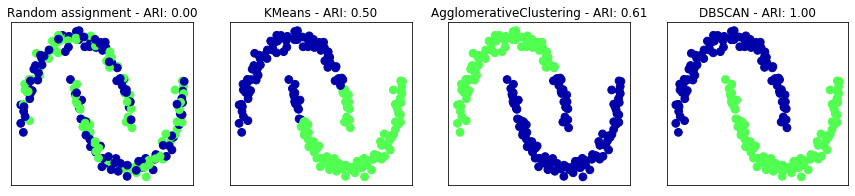

In [52]:
from sklearn.metrics.cluster import adjusted_rand_score
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# Rescale the data to zero mean and unit variance
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

fig, axes = plt.subplots(1, 4, figsize=(15, 3),
                         subplot_kw={'xticks': (), 'yticks': ()})

# make a list of algorithms to use
algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2),
              DBSCAN()]

# create a random cluster assignment for reference
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))

# plot random assignment
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_clusters,
                cmap=mglearn.cm3, s=60)
axes[0].set_title("Random assignment - ARI: {:.2f}".format(
        adjusted_rand_score(y, random_clusters)))

for ax, algorithm in zip(axes[1:], algorithms):
    # plot the cluster assignments and cluster centers
    clusters = algorithm.fit_predict(X_scaled)
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters,
               cmap=mglearn.cm3, s=60)
    ax.set_title("{} - ARI: {:.2f}".format(algorithm.__class__.__name__,
                                           adjusted_rand_score(y, clusters)))

调整 rand 指数给出了符合直觉的结果，随机簇分配的分数为 0，而 DBSCAN（完美地找到了期望中的聚类）的分数为 1

- 用这种方式评估聚类时，一个常见的错误是使用 `accuracy_score` 而不是 `adjusted_rand_score`、`normalized_mutual_info_score` 或其他聚类指标
- 使用精度的问题在于，它要求分配的簇标签与真实值完全匹配，但簇标签本身毫无意义——唯一重要的是哪些点位于同一个簇中

In [53]:
from sklearn.metrics import accuracy_score

# these two labelings of points correspond to the same clustering
clusters1 = [0, 0, 1, 1, 0]
clusters2 = [1, 1, 0, 0, 1]
# accuracy is zero, as none of the labels are the same
print("Accuracy: {:.2f}".format(accuracy_score(clusters1, clusters2)))
# adjusted rand score is 1, as the clustering is exactly the same:
print("ARI: {:.2f}".format(adjusted_rand_score(clusters1, clusters2)))

Accuracy: 0.00
ARI: 1.00


 #### Evaluating clustering without ground truth

在实践中，通常没有真实值来比较结果
- 如果知道了数据的正确聚类，那么可以使用这一信息构建一个监督模型（比如分类器），因此，使用类似 ARI 和 NMI 的指标通常仅有助于开发算法，但对评估应用是否成功没有帮助
- 在一些聚类的评分指标不需要真实值，比如轮廓系数（silhouette coeffient），但它们在实践中的效果并不好
    - 轮廓分数计算一个簇的紧致度，其值越大越好，最高分数为 1
    - 虽然紧致的簇很好，但紧致度不允许复杂的形状

下面是一个例子，利用轮廓分数在 two_moons 数据集上比较 k 均值、凝聚聚类和 DBSCAN

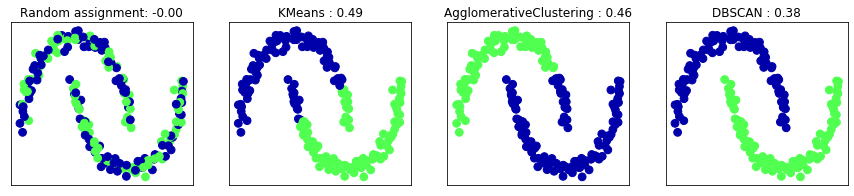

In [54]:
from sklearn.metrics.cluster import silhouette_score

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# rescale the data to zero mean and unit variance
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

fig, axes = plt.subplots(1, 4, figsize=(15, 3),
                         subplot_kw={'xticks': (), 'yticks': ()})

# create a random cluster assignment for reference
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))

# plot random assignment
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_clusters,
                cmap=mglearn.cm3, s=60)
axes[0].set_title("Random assignment: {:.2f}".format(
    silhouette_score(X_scaled, random_clusters)))

algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2),
              DBSCAN()]

for ax, algorithm in zip(axes[1:], algorithms):
    clusters = algorithm.fit_predict(X_scaled)
    # plot the cluster assignments and cluster centers
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm3,
               s=60)
    ax.set_title("{} : {:.2f}".format(algorithm.__class__.__name__,
                                      silhouette_score(X_scaled, clusters)))

如上图所示，k 均值的轮廓分数最高，尽管更喜欢 DBSCAN 的结果
- 对于评估聚类，稍好的策略是使用基于鲁棒性的（robustness-based）聚类指标，并对结果进行比较
    - 其思想是，如果许多算法和许多数据扰动返回相同的结果，那么它很可能是可信的
    - 不幸的是，sickit-learn 还没有实现这一策略
- 在实践中，即使得到一个鲁棒性很好的聚类或非常高的轮廓分数，但仍然不知道聚类中是否有任何语义含义，或者聚类是否反映了数据中感兴趣的某个方面
    - 要想知道聚类是否对应于感兴趣的内容，唯一的办法就是对簇进行人工分析

### Summary of Clustering Methods

聚类的应用与评估是一个非常定性的过程，通常在数据分析的探索阶段很有帮助

- k 均值可以用簇的平均值来表示簇，它还可以被看作是一种分解方法，每个数据点都由其簇中心表示
- DBSCAN 可以检测到没有分配任何簇的“噪声点”，还可以帮助自动判断簇的数量
    - 与其他两种方法不同，它允许簇具有复杂的形状
    - DBSCAN 有时会生成大小差别很大的簇，这可能是它的优点，也可能是缺点
- 凝聚聚类可以提供数据的可能划分的整个层次结果，可以通过树状图轻松查看